<a href="https://colab.research.google.com/github/Archana7203/Projects/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import necessary libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data preprocessing and visualization

In [59]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [61]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [62]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [63]:
numeric_features = df.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_features

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [64]:
categorical_features = df.select_dtypes(include=['bool','object']).columns.tolist()
categorical_features

['gender', 'smoking_history']

In [65]:
df[numeric_features].corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [66]:
for feature in numeric_features:
    if ((feature != 'diabetes')and (feature!='hypertension')and(feature!='heart_disease')):
      Q1 = df[feature].quantile(0.25)
      Q3 = df[feature].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - (1.5 * IQR)
      upper_bound = Q3 + (1.5 * IQR)
      df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound),df[feature].mean(), df[feature])

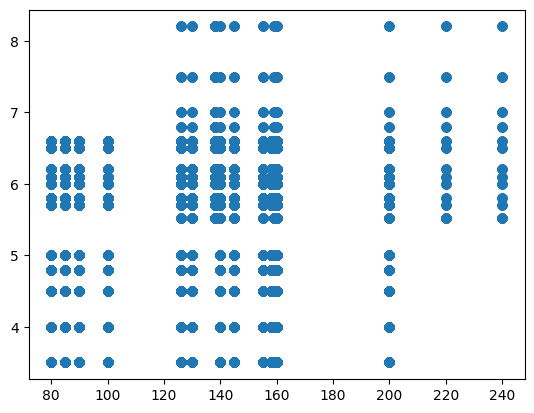

In [67]:
plt.scatter(y=df['HbA1c_level'],x=df['blood_glucose_level'])

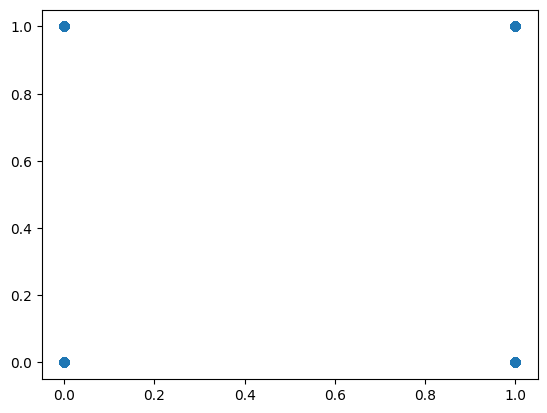

In [68]:
plt.scatter(df['hypertension'],df['heart_disease'])

In [69]:
Mean = []
Std_dev = []
for feature in numeric_features:
  if ((feature != 'diabetes')and (feature!='hypertension')and(feature!='heart_disease')):
    mean_ = df[feature].mean()
    Mean.append(mean_)
    std_dev = df[feature].std()
    Std_dev.append(std_dev)
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

In [70]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.692695,0,1,never,-0.270220,1.119793,0.138038,0
1,Female,0.538004,0,0,No Info,0.180863,1.119793,-1.572288,0
2,Male,-0.616688,0,0,never,0.180863,0.217409,0.651136,0
3,Female,-0.261398,0,0,current,-0.638710,-0.484446,0.565620,0
4,Male,1.515050,1,1,current,-1.339688,-0.684976,0.565620,0
...,...,...,...,...,...,...,...,...,...
99995,Female,1.692695,0,0,No Info,0.180863,0.718733,-1.287234,0
99996,Female,-1.771379,0,0,No Info,-1.926308,1.019528,-1.002180,0
99997,Male,1.070938,0,0,former,0.288869,0.217409,0.565620,0
99998,Female,-0.794332,0,0,never,1.896248,-1.487095,-1.002180,0


In [71]:
categorical_features.append('hypertension')
categorical_features.append('heart_disease')

In [72]:
for i in categorical_features:
  print(df[i].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
hypertension
0    92515
1     7485
Name: count, dtype: int64
heart_disease
0    96058
1     3942
Name: count, dtype: int64


##Split the dataset into features and targets

In [73]:
X = df.drop(['diabetes'],axis=1) #features
y = df['diabetes']#target

##Split the dataset into test and train

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
74736,Female,1.692695,1,0,former,0.180863,1.019528,0.280565
36589,Female,-1.016388,0,0,never,-0.272337,-0.985770,-0.261038
37414,Female,-0.261398,0,0,No Info,-0.109270,1.119793,1.848365
71251,Female,-0.305809,0,0,current,-0.642945,0.518204,0.679641
40454,Female,-0.527865,0,0,No Info,-0.814484,-0.484446,-1.287234
...,...,...,...,...,...,...,...,...
17083,Female,-0.128164,0,0,never,1.231272,-0.684976,-0.147016
27250,Male,0.049480,0,0,never,0.180863,0.718733,0.651136
33409,Female,0.449181,1,0,former,0.180863,0.317674,0.565620
91639,Female,-1.638145,0,0,No Info,-2.284209,0.718733,0.565620


##Implement one hot encoding

In [76]:
!pip install --upgrade category_encoders

In [77]:
import category_encoders as ce

In [78]:
import pickle

In [79]:
print(categorical_features)

['gender', 'smoking_history', 'hypertension', 'heart_disease']


In [80]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [81]:
encoder=ce.OneHotEncoder(cols=categorical_features)
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [82]:
X_train

,gender_1,gender_2,gender_3,age,hypertension_1,hypertension_2,heart_disease_1,heart_disease_2,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5,smoking_history_6,bmi,HbA1c_level,blood_glucose_level
74736,1,0,0,1.692695,1,0,1,0,1,0,0,0,0,0,0.180863,1.019528,0.280565
36589,1,0,0,-1.016388,0,1,1,0,0,1,0,0,0,0,-0.272337,-0.985770,-0.261038
37414,1,0,0,-0.261398,0,1,1,0,0,0,1,0,0,0,-0.109270,1.119793,1.848365
71251,1,0,0,-0.305809,0,1,1,0,0,0,0,1,0,0,-0.642945,0.518204,0.679641
40454,1,0,0,-0.527865,0,1,1,0,0,0,1,0,0,0,-0.814484,-0.484446,-1.287234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17083,1,0,0,-0.128164,0,1,1,0,0,1,0,0,0,0,1.231272,-0.684976,-0.147016
27250,0,1,0,0.049480,0,1,1,0,0,1,0,0,0,0,0.180863,0.718733,0.651136
33409,1,0,0,0.449181,1,0,1,0,1,0,0,0,0,0,0.180863,0.317674,0.565620
91639,1,0,0,-1.638145,0,1,1,0,0,0,1,0,0,0,-2.284209,0.718733,0.565620


##Implement various classification algorithms

In [83]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [84]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred=model.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.9519


<Axes: >

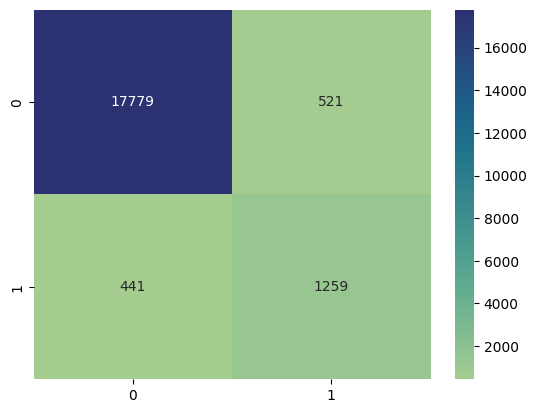

In [87]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='crest')

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [89]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
y_pred=rfc.predict(X_test)

In [91]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.9671


<Axes: >

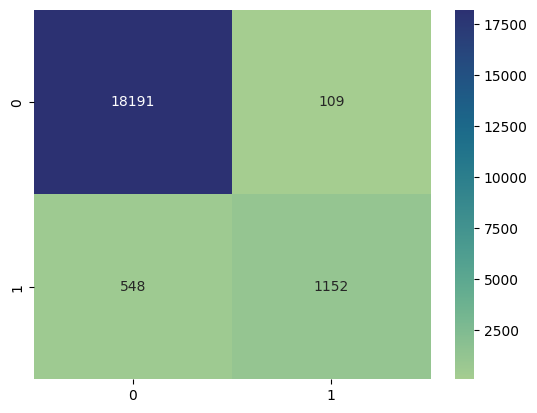

In [92]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='crest')

In [93]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [94]:
model1.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred = model1.predict(X_test)

In [96]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.9332


<Axes: >

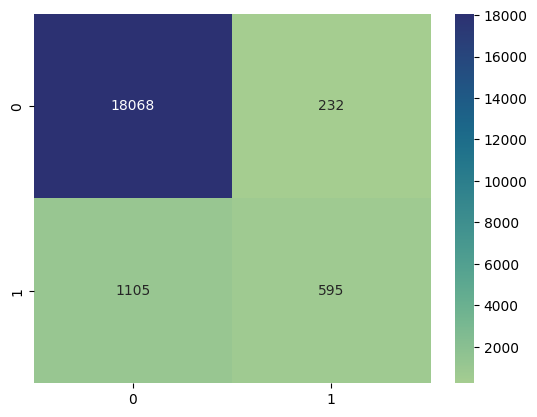

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='crest')

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [99]:
gnb.fit(X_train,y_train)

GaussianNB()

In [100]:
y_pred = gnb.predict(X_test)

In [101]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.6878


<Axes: >

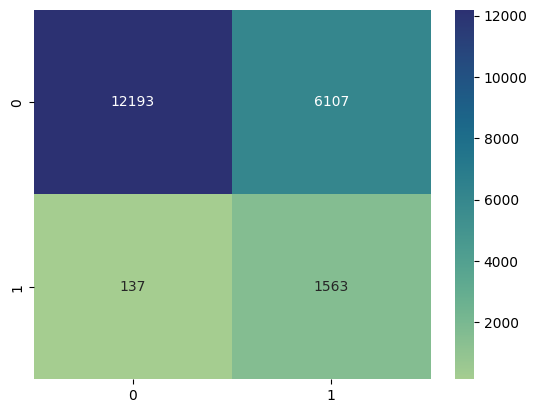

In [102]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='crest')

In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [104]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [105]:
y_pred = classifier.predict(X_test)

In [106]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.9399


<Axes: >

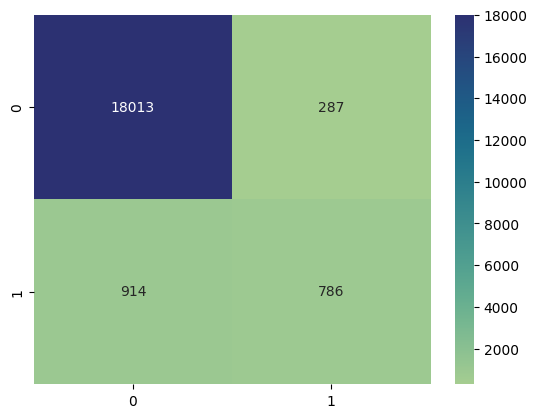

In [107]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='crest')

In [108]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')

In [109]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [110]:
y_pred = svm_classifier.predict(X_test)

In [111]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.9314


<Axes: >

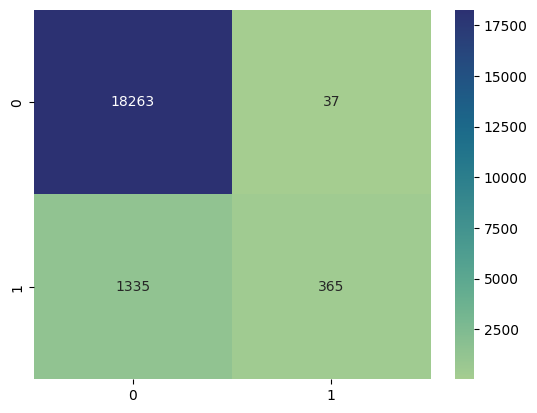

In [112]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='crest')

In [113]:
final_model = rfc
with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

##Predictions on user inputs
Build user interfaces using gradio

In [121]:
def predict(gender,age,hp,hd,sh,bmi,hba1c,bg):
  with open("model.pkl", "rb") as f:
      model=pickle.load(f)
  age = (age-Mean[0])/Std_dev[0]
  hba1c = (hba1c-Mean[2])/Std_dev[2]
  bmi = (bmi-Mean[1])/Std_dev[1]
  bg = (bg-Mean[3])/Std_dev[3]
  predictions = [gender,age,hp,hd,sh,bmi,hba1c,bg]
  input_df = pd.DataFrame([predictions], columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'])
  encoded_input_data = apply_one_hot_encoding(input_df)
  predictions = model.predict(encoded_input_data)
  predictions = list(predictions)
  if (predictions[0]==0):
    return "absence of diabetes"
  elif(predictions[0]==1):
    return "presence of diabetes"

In [122]:
def apply_one_hot_encoding(data):
    with open("encoder.pkl", "rb") as f:
      encoder=pickle.load(f)
    encoded_data = encoder.transform(data)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(data.columns))

    return encoded_df

In [116]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.7 MB/s 

In [117]:
import gradio as gr

In [123]:
outputs=gr.Textbox()

demo = gr.Interface(predict,[gr.Radio(["Female", "Male"], label="Gender"),
gr.Number(label="Age"),
gr.Radio(["0", "1"], label="hypertension"),
gr.Radio(["0", "1"], label="heart_disease"),
gr.Dropdown(["never","ever","former","current","not current"], label="Smoking History"),
gr.Number(label="BMI"),
gr.Number(label="HbA1c level"),
gr.Number(label="Blood glucose level")],
outputs=outputs,
title="Diabetes prediction system",
description="Predicting diabetes in a single click"
)

demo.launch(share="True",debug="True")

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://21c34be8acfdaa8000.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://21c34be8acfdaa8000.gradio.live
